In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict

def plot_model_comparison(metrics_dict: Dict[str, pd.DataFrame]) -> None:
    # Convert the dictionary of DataFrames (one row per model) into a single DataFrame
    # We add a column "Model" to identify each row with its model name
    df_combined = pd.concat(
        [df.assign(Model=model) for model, df in metrics_dict.items()],
        ignore_index=True  # Reset index to get a clean continuous index
    )

    # Reshape the wide-format DataFrame into long-format:
    # Columns: ['Model', 'Metric', 'Value']
    # This format is easier to plot with multiple bars per metric
    df_melted = df_combined.melt(
        id_vars="Model",        # Keep 'Model' column as-is
        var_name="Metric",      # Convert former columns into a single 'Metric' column
        value_name="Value"      # Values of the metrics go into 'Value' column
    )

    # Set up figure and axis with specified size
    plt.figure(figsize=(14, 6))
    ax = plt.subplot()  # Create a single subplot (1x1 grid)

    # Get list of model names for indexing and positioning bars
    model_list = df_melted["Model"].unique().tolist()
    # `.tolist()` converts the pandas Index object to a standard Python list

    # Iterate over each model to draw its bars
    for model in model_list:
        # Filter the melted DataFrame for the current model
        subset = df_melted[df_melted["Model"] == model]

        # Compute horizontal bar positions offset by model index to group them side-by-side
        # Each bar is shifted by 0.2 * model_index so that bars for different models appear side-by-side
        bar_positions = [
            i + 0.2 * model_list.index(model)  # model_list.index(model) returns the index of current model
            for i in range(len(subset))
        ]

        # Draw the bars for the current model
        ax.bar(
            bar_positions,       # x positions for bars
            subset["Value"],     # heights of bars
            width=0.2,           # width of each bar
            label=model          # label used in the legend
        )

    # Extract list of metric names in the order they appear
    metrics = df_melted["Metric"].unique()

    # Set x-tick positions to center the groups of bars
    tick_positions = [i + 0.2 for i in range(len(metrics))]  # Centered between grouped bars

    # Set the tick positions and labels
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(metrics, rotation=45, ha='right')  # Rotate labels for readability

    # Add axis labels and title
    ax.set_ylabel("Score")  # Y-axis label
    ax.set_title("Model Comparison Across Metrics")  # Plot title

    # Add a legend to differentiate models
    ax.legend()

    # Add horizontal gridlines for better readability
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Only grid on y-axis

    # Adjust layout to prevent label overlap
    plt.tight_layout()

    # Display the plot
    plt.show()


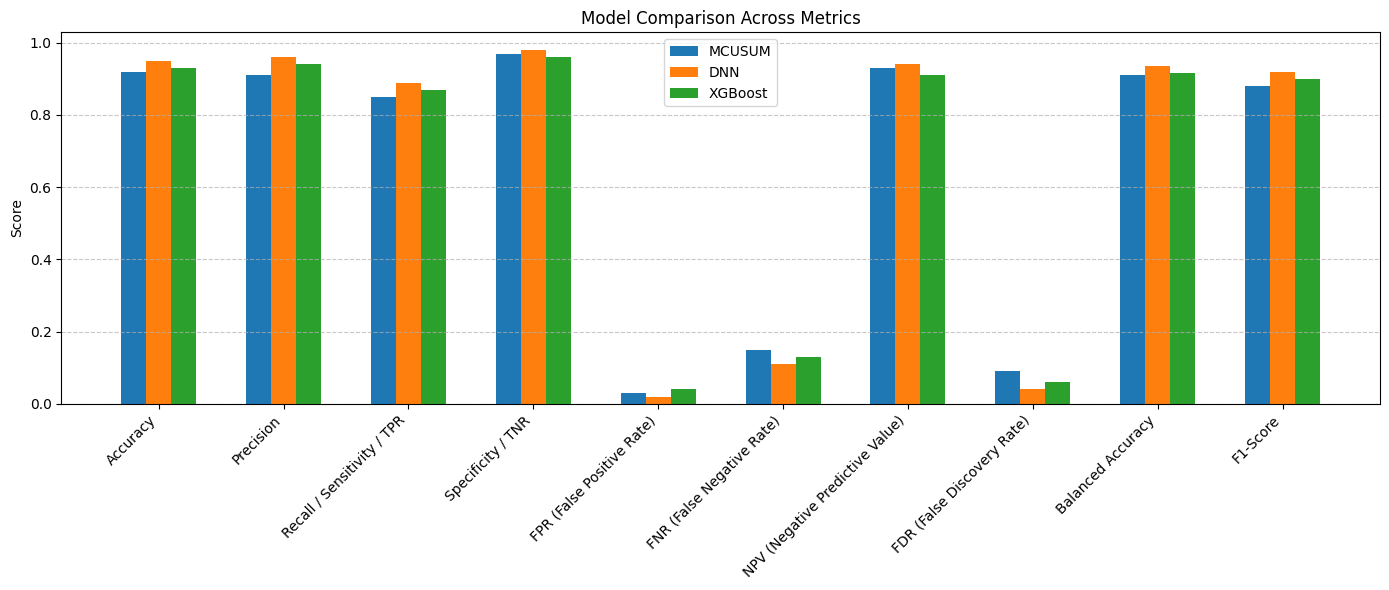

In [2]:
import pandas as pd

metrics_dict = {
    "MCUSUM": pd.DataFrame([{
        "Accuracy": 0.92,
        "Precision": 0.91,
        "Recall / Sensitivity / TPR": 0.85,
        "Specificity / TNR": 0.97,
        "FPR (False Positive Rate)": 0.03,
        "FNR (False Negative Rate)": 0.15,
        "NPV (Negative Predictive Value)": 0.93,
        "FDR (False Discovery Rate)": 0.09,
        "Balanced Accuracy": 0.91,
        "F1-Score": 0.88
    }]),
    "DNN": pd.DataFrame([{
        "Accuracy": 0.95,
        "Precision": 0.96,
        "Recall / Sensitivity / TPR": 0.89,
        "Specificity / TNR": 0.98,
        "FPR (False Positive Rate)": 0.02,
        "FNR (False Negative Rate)": 0.11,
        "NPV (Negative Predictive Value)": 0.94,
        "FDR (False Discovery Rate)": 0.04,
        "Balanced Accuracy": 0.935,
        "F1-Score": 0.92
    }]),
    "XGBoost": pd.DataFrame([{
        "Accuracy": 0.93,
        "Precision": 0.94,
        "Recall / Sensitivity / TPR": 0.87,
        "Specificity / TNR": 0.96,
        "FPR (False Positive Rate)": 0.04,
        "FNR (False Negative Rate)": 0.13,
        "NPV (Negative Predictive Value)": 0.91,
        "FDR (False Discovery Rate)": 0.06,
        "Balanced Accuracy": 0.915,
        "F1-Score": 0.90
    }])
}


plot_model_comparison(metrics_dict)


This function `plot_model_comparison` compares model performance metrics by plotting **grouped bar charts**, where each group is a metric, and each bar is a model's value for that metric.

---

### Step-by-Step Explanation

---

#### **Step 1: Combine the Input Data**

```python
df_combined = pd.concat(
    [df.assign(Model=model) for model, df in metrics_dict.items()],
    ignore_index=True
)
```

* The input is a `dict[str, pd.DataFrame]`, where each DataFrame has one row of metrics for a model.
* We loop through each `(model, df)` pair.
* `.assign(Model=model)` adds a column to each DataFrame so we know which row belongs to which model.
* `pd.concat([...], ignore_index=True)` stacks all these DataFrames into a single DataFrame with one row per model, and a new column `"Model"`.

**Example output:**

| Accuracy | Precision | ... | Model  |
| -------- | --------- | --- | ------ |
| 0.938    | 0.976     | ... | MCUSUM |
| 0.951    | 1.000     | ... | DNN    |

---

#### **Step 2: Reshape the Data for Plotting**

```python
df_melted = df_combined.melt(
    id_vars="Model", var_name="Metric", value_name="Value"
)
```

* This reshapes the table from **wide** format to **long** format.
* `melt` turns each metric column into rows under a new `"Metric"` column.
* The result has 3 columns: `["Model", "Metric", "Value"]`.

**Example output:**

| Model  | Metric    | Value   |
| ------ | --------- | ------- |
| MCUSUM | Accuracy  | 0.93812 |
| MCUSUM | Precision | 0.97614 |
| DNN    | Accuracy  | 0.95085 |
| DNN    | Precision | 1.00000 |
| ...    | ...       | ...     |

---

#### **Step 3: Prepare the Plot Canvas**

```python
plt.figure(figsize=(14, 6))
ax = plt.subplot()
```

* Creates a `14x6` inches plot area.
* `plt.subplot()` creates a single subplot and assigns it to `ax`.

---

#### **Step 4: Plot Bars for Each Model**

```python
model_list = df_melted["Model"].unique().tolist()
```

* Get the list of models in the dataset (e.g. `['MCUSUM', 'DNN']`).
* `.tolist()` turns the pandas Index into a plain Python list so we can use `.index()` on it.

```python
for model in model_list:
    subset = df_melted[df_melted["Model"] == model]
```

* Loop over each model and select only its metric values.

```python
bar_positions = [
    i + 0.2 * model_list.index(model)
    for i in range(len(subset))
]
```

* Compute the horizontal (x-axis) positions for this model’s bars.
* Each model’s bars are offset by `0.2 * index`, so that bars don’t overlap.

```python
ax.bar(
    bar_positions,
    subset["Value"],
    width=0.2,
    label=model
)
```

* Draws the bars for this model.

---

#### **Step 5: Configure X-axis Labels**

```python
metrics = df_melted["Metric"].unique()
tick_positions = [i + 0.2 for i in range(len(metrics))]
ax.set_xticks(tick_positions)
ax.set_xticklabels(metrics, rotation=45, ha='right')
```

* X-ticks are positioned at the center of grouped bars for each metric.
* Rotates labels diagonally so they don't overlap.

---

#### **Step 6: Add Labels, Legend, and Grid**

```python
ax.set_ylabel("Score")
ax.set_title("Model Comparison Across Metrics")
ax.legend()
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
```

* Adds y-axis label, plot title, and a legend.
* Adds **horizontal gridlines** for easier visual comparison of bar heights.

---

#### **Step 7: Layout & Show**

```python
plt.tight_layout()
plt.show()
```

* `tight_layout()` prevents overlap of labels and axes.
* `show()` renders the plot in the output.

---

### Final Output

* One grouped bar chart.
* Each group = a metric.
* Each bar within a group = value of that metric for a model.
* Supports any number of models and metrics dynamically.
